<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 38px; color: black; font-weight: bold;">
Latent Neural SDE Toy VAE example
</div>

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Biblio
</div>

Neural ODEs:

**Neural ODEs (https://arxiv.org/abs/1806.07366) (2019)** : introduction of the Neural ODE as the continuous-time limit of a ResNet stack. Presentation of the use of the adjoint sensitivity method. Seminal paper for Neural ODE.

**Latent ODEs for Irregularly-Sampled Time Series (https://arxiv.org/abs/1907.03907) (2019)** : Evolution of the Neural ODE model towards a Neural ODE RNN model, where the approximate posterior is built with a RNN on past observations.

Neural SDEs:

**SDE Matching: Scalable and Simulation-Free Training of Latent Stochastic Differential Equations (https://arxiv.org/abs/2502.02472 , 2025)** : good background section (#2) to explain Neural SDE. Propose a new method SDE matching, inspired by score and flow matching, vs the adjoint sensivity method. SDE matching is claimed to be more efficient to compute gradients and train latent SDEs.

**Scalable Gradients for Stochastic Differential Equations (https://arxiv.org/abs/2001.01328) (2020)** : generalization of the adjoint sensitivity method to SDEs. Combination with gradient-based stochastic variational inference for infinite-dimension VAEs.

**Neural SDEs (https://www.researchgate.net/publication/333418188_Neural_Stochastic_Differential_Equations) (2019)** : link between infinitely deep residual networks and solutions to stochastic differential equations

**Stable Neural SDEs in analyzing irregular time series data (https://arxiv.org/abs/2402.14989) (2025)** : points to the necessity of careful design of the drift and diffusion neural nets in latent SDEs. Introduces three latent SDEs models with performance guarantees.

**Generative Modeling of Neural Dynamics via Latent Stochastic Differential Equations (https://arxiv.org/abs/2412.12112) (2024)** : application of neural SDEs to a biological use case (brain activity). Details the model, architecture, ELBO/loss computation. Takes into account inputs/commands in the model. 

General/Misc:

**Efﬁcient gradient computation for dynamical models (https://www.fil.ion.ucl.ac.uk/~wpenny/publications/efficient_revised.pdf) (2014)** : summary of finite difference method, forward sensitivity method, adjoint sensitivity method, to compute gradients of a functional cost function. Applies to Neural ODEs training.

**Cyclical Annealing Schedule: A Simple Approach to Mitigating KL Vanishing (https://arxiv.org/abs/1903.10145) (2019)** : explanation of the posterior collapse/KL vanishing problem, introduces different KL annealing schedules for VAE training.


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Code : torchsde library by Google Research
</div>

https://github.com/google-research/torchsde

[1] Xuechen Li, Ting-Kam Leonard Wong, Ricky T. Q. Chen, David Duvenaud. "Scalable Gradients for Stochastic Differential Equations". International Conference on Artificial Intelligence and Statistics. 2020. [arXiv]

[2] Patrick Kidger, James Foster, Xuechen Li, Harald Oberhauser, Terry Lyons. "Neural SDEs as Infinite-Dimensional GANs". International Conference on Machine Learning 2021. [arXiv]

[3] Patrick Kidger, James Foster, Xuechen Li, Terry Lyons. "Efficient and Accurate Gradients for Neural SDEs". 2021. [arXiv]

[4] Patrick Kidger, James Morrill, James Foster, Terry Lyons, "Neural Controlled Differential Equations for Irregular Time Series". Neural Information Processing Systems 2020. [arXiv]



<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model & Math
</div>

Data : $\mathbf{X} = (x_{t_1}, x_{t_2}, ..., x_{t_N}) \in \mathbb{R}^{D_x}$ - assuming all $t_i \in [0,1]$.

The latent space has dimension $D_z$. The latent continuous dynamic is $\mathbf{Z}$ defined by:
\begin{align*}
z_0^{(\theta)} &\sim p_{\theta_z}(z_0) \\
dz_t^{(\theta)} &= f_{\theta}(z_t, t)dt + \sigma_{\theta}(z_t,t)dB_t 
\end{align*}
with: 
\begin{align}
\textbf{drift} \,& f_{\theta} : \mathbb{R}^{D_z} \times [0,1] \rightarrow \mathbb{R}^{D_z} \\
\textbf{diffusion} \,& \sigma_{\theta} : \mathbb{R}^{D_z} \times [0,1] \rightarrow \mathbb{R}^{D_z \times D_z} \\
\textbf{Brownian motion} \,& dB_t \in \mathbb{R}^{D_z}
\end{align}

The decoder is classically:
\begin{align}
p_{\theta_x}(x_{t_i} \vert z_{t_i})
\end{align}

The approximate posterior (encoder) is also a SDE:
\begin{align}
z_0^{(\phi)} &\sim q_{\phi}(z_0 \vert \textbf{X}) \\
dz_t^{(\phi)} &= f_{\phi}(z_t, t, \textbf{X})dt + \sigma_{\theta}(z_t,t)dB_t 
\end{align}

where:
- the drift $f_{\phi}(z_t, t, \textbf{X})$ is conditionned on observations $\textbf{X}$
- the diffusion of the approximate posterior is shared with the diffusion of the prior : $\sigma_{\theta}(z_t,t)$ - this ensures the application of Girsanov theorem and a finite KL divergence between the two stochastic processes (prior and approximate posterior) (see Generative Modeling of Neural Dynamics via Latent Stochastic Differential Equations (https://arxiv.org/abs/2412.12112) (2024))
- drift and diffusion neural nets do not exhibit the same convergence guarantee (Stable Neural SDEs in analyzing irregular time series data (https://arxiv.org/abs/2402.14989) (2025))
- non-diagonal diffusion seems to be difficult to simulate and costly to approximate (Scalable Gradients for Stochastic Differential Equations (https://arxiv.org/abs/2001.01328) (2020))
- it seems a good practice to encode only part of the $\textbf{X}$ in the approximate posterior : context vector (Scalable Gradients for Stochastic Differential Equations (https://arxiv.org/abs/2001.01328) (2020)), and $t_c << t_n$ in Generative Modeling of Neural Dynamics via Latent Stochastic Differential Equations (https://arxiv.org/abs/2412.12112) (2024).

Variational lower bound on the log marginal likelihood:

We write:
\begin{align}
p(x_{t_1:t_N}) &= \frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{p(z_{t_1:t_N} \vert x_{t_1:t_N})}
\end{align}
And:
\begin{align}
\log{p(x_{t_1:t_N})} &= \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{q_{\phi}(z\vert X)}\frac{q_{\phi}(z\vert X)}{p(z_{t_1:t_N} \vert x_{t_1:t_N})}} dz
\end{align}
where $q_{\phi}(z \vert X)$ is formally is posterior distribution over **functions** $z : \mathbb{R} \rightarrow \mathbb{R}^{D_z}$.
Then:
\begin{align}
\log{p(x_{t_1:t_N})} &= \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{q_{\phi}(z\vert X)}} dz + \mathbb{KL}(q_{\phi}(z\vert X) \vert\vert p(z_{t_1:t_N} \vert x_{t_1:t_N}))
\end{align}
where we -audaciously- consider $p(z_{t_1:t_N} \vert x_{t_1:t_N})$ as a dsitribution over functions $z$ taking values $z_{t_1:t_N}$ at times $t_1:t_N$ so the $\mathbb{KL}$ actually means something.
Still on the same path:
\begin{align}
\log{p(x_{t_1:t_N})} &\geq \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N}, z_{t_1:t_N})}{q_{\phi}(z\vert X)}} dz \\
&= \int q_{\phi}(z \vert X) \log{\frac{p(x_{t_1:t_N} \vert z_{t_1:t_N})}{q_{\phi}(z\vert X)} p(z_{t_1:t_N})} dz \\
&= \mathbb{E}_{q_{\phi}(z \vert X)} \log{p(x_{t_1:t_N} \vert z_{t_1:t_N})} - \mathbb{KL}(q_{\phi}(z\vert X) \vert\vert p(z_{t_1:t_N})) \\
\end{align}
We write -still audaciously-
\begin{align}
\mathbb{KL}(q_{\phi}(z\vert X) \vert\vert p(z_{t_1:t_N})) &= \mathbb{KL}(q_{\phi}(z_0\vert X) \vert\vert p_{\theta_z}(z_0)) + \mathbb{KL}(q_{\phi}(z_{>0}\vert X) \vert\vert p_{\theta_z}(z_{>0}))
\end{align}
where the first $\mathbb{KL}$ on the r.h.s is a classic between two probability distributions over a random variable, and the second is derived from the Girsanov's theorem as:
\begin{align}
\mathbb{KL}(q_{\phi}(z_{>0}\vert X) \vert\vert p_{\theta_z}(z_{>0})) &= \frac{1}{2} \mathbb{E}_{q_{\phi}(z_{>0}\vert X)} \left( \int_{0}^{T} \vert \Delta(t) \vert^2 dt \right) \\
\Delta(t) &= \sigma_{\theta}^{-1}(z_t,t) (f_{\phi}(z_t, t, \textbf{X}) - f_{\theta}(z_t, t))
\end{align}

Finally:
\begin{align}
\mathcal{L}(\theta, \phi, \textbf{X}) &= \mathbb{E}_{q_{\phi}(z \vert X)} \log{p(x_{t_1:t_N} \vert z_{t_1:t_N})} - \mathbb{KL}(q_{\phi}(z_0\vert X) \vert\vert p_{\theta_z}(z_0)) - \frac{1}{2} \mathbb{E}_{q_{\phi}(z_{>0}\vert X)} \left( \int_{0}^{T} \vert \Delta(t) \vert^2 dt \right)
\end{align}

During training:
- the integral is approximated via numerical integration
- expectations are estimated with MC sampling
- NB : sampling is actually : sampling $z_0 \sim q_{\phi}(z_0 \vert \textbf{X})$ and sampling a function $z$ by sampling a Brownian motion path $B_t$ and computing the whole realization path $z_t$.

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Set Up
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torchsde
# from torchdiffeq import odeint, odeint_adjoint

# from mpl_toolkits.mplot3d import Axes3D
import timeit
from tqdm import tqdm

In [2]:
def seed_everything(seed=42):
    """
    Set seed for reproducibility.
    """
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
seed_everything()

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    dtype = torch.FloatTensor

print(f"Using {device}")

torch.set_default_dtype(torch.float32)

if device.type == 'cuda':
    print('GPU Name:', torch.cuda.get_device_name(0))
    print('Total GPU Memory:', round(torch.cuda.get_device_properties(0).total_memory/1024**3,1), 'GB')

Using cuda
GPU Name: NVIDIA GeForce RTX 3080 Ti
Total GPU Memory: 11.8 GB


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Data and Problem Statement
</div>

- We observe a deterministic function with Gaussian noise

In [4]:
LENGTH = 100 # total number of points used to generate the data

In [5]:
def f(x):
    """Data generating funtion"""
    y = x * torch.sin(x * 8 * torch.pi)
    return y

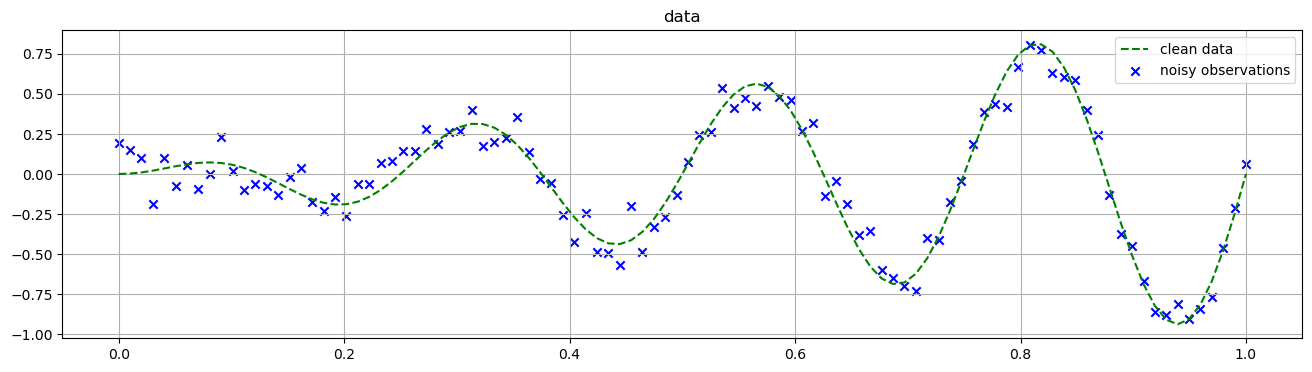

In [6]:
t_start = 0.0
t_end = 1.0
times = torch.linspace(t_start, t_end, LENGTH).to(device)
x_ = f(times)
sigma = torch.tensor(0.1).to(device)
x = x_ + torch.randn((LENGTH,)).to(device) * sigma

fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
ax.plot(times.detach().cpu(), x_.detach().cpu(), label='clean data', color='green', ls='--' )
ax.scatter(times.detach().cpu(), x.detach().cpu(), label='noisy observations', marker='x', color='blue')
ax.grid(True)
ax.legend()
ax.set_title(f'data')
plt.show()

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Model
</div>

In [7]:
# dimension of the observation space... 1 for now !
Dx = 1
# dimension of the latent space
Dz = 4
# dimension of the LSTM
Dl = 16

# number of SDE samples (aka batch size in torchsde.sdeint)
K = 3

Prior :
- O.U. process
- shared diffusion with the posterior (so a KL can be computed)
- initial value is sampled from a standard normal

Shared diffusion:
- the SDEs we use are Ito type (sic) with a noise type 'diagonal'
- so the shared diffusion has an output (batch_size, state_size) ie (number_of_SDE_sample, Dz) here

Our shared diffusion is a MLP that output a Dz-sized vector

In [8]:
class SharedDiffusion(nn.Module):
    """
    Shared diffusion MLP, for use in SDE prior and posterior
    """
    def __init__(self, n_layers=1, input_dim=Dz, hidden_dim=32, output_dim=Dz):
        super().__init__()
        self.n_layers = n_layers
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        layers = []
        input_dim = self.input_dim + 1  # add time dimension
        for i in range(int(self.n_layers)):
            layers.append(torch.nn.Linear(input_dim, self.hidden_dim))
            layers.append(torch.nn.Tanh())
            input_dim = self.hidden_dim
        layers.append(torch.nn.Linear(self.hidden_dim, self.output_dim))
        self.mlp = torch.nn.Sequential(*layers)
        
    def forward(self,t,z):
        """
        inputs:
        --- 1/ when called during torchsde.sdeint :
        t (tensor) ()
        z (latent variable tensor) (batch_size, Dz)
        --- 2/ when called on a full path to compute a KL :
        t (tensor) (N,)
        z (latent variable tensor) (N, batch_size, Dz)
        """
        # print(f"Inputs in shared diffusion")
        # if t.dim()==0:
        #     print(f"t = tensor dim 0, {t.shape}")
        # else:
        #     print(f"t tensor dim >= 1, {t.shape}")
        # print(f"z tensor shape : {z.shape}")
        if t.dim()==0:
            K = z.size(0) # K=batch_size
            t_ = torch.full(size=(K,1), fill_value=t).to(device) # (batch_size, 1)
            z_ext = torch.cat([t_,z], dim=-1) # (batch_size, Dz+1)
            diff = self.mlp(z_ext)
        else:
            K = z.size(1) # batch_size
            t_ = t.unsqueeze(-1).repeat(1,K).unsqueeze(-1) # (N,K,1)
            z_ext = torch.cat([t_,z], dim=-1) # (batch_size,K,Dz+1)
            diff = self.mlp(z_ext)
        return diff
    
    def __repr__(self):
        desc = f"Shared Diffusion model"
        desc += f"\n MLP is {self.mlp}"
        return desc

In [9]:
shared_diffusion = SharedDiffusion().to(device)
print(shared_diffusion)

# case 1
batch_size = 3
t = torch.tensor(1.0).to(device)
z = torch.randn((batch_size,Dz)).to(device)
print(f"\nsignature 1")
diff = shared_diffusion(t,z)
print(f"Inputs : time {t}, z {z.shape}")
print(f"Output : diffusion diagonal {diff.shape}")

# case 2
batch_size = 3
t = torch.linspace(0.0,1.0,LENGTH).to(device) # (L,1)
z = torch.randn(LENGTH,batch_size,Dz).to(device) # (L,K,Dz)
print(f"\nsignature 2")
diff = shared_diffusion(t,z)
print(f"Inputs : time {t.shape}, z {z.shape}")
print(f"Output : diffusion diagonal {diff.shape}")

Shared Diffusion model
 MLP is Sequential(
  (0): Linear(in_features=5, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=4, bias=True)
)

signature 1
Inputs : time 1.0, z torch.Size([3, 4])
Output : diffusion diagonal torch.Size([3, 4])

signature 2
Inputs : time torch.Size([100]), z torch.Size([100, 3, 4])
Output : diffusion diagonal torch.Size([100, 3, 4])


In [10]:
class SDEPrior(nn.Module):
    """
    Simple O.U. for prior
    """
    def __init__(self, shared_diffusion, theta=1.0, mu=1.0):
        # "diagonal" noise type
        # sde_type can be "ito" or "stratonovich"
        # we use "ito" here. The available methods for computation are Euler(-Maruyama), Milstein, SRK.
        super().__init__()
        self.noise_type = "diagonal"
        self.sde_type = "ito"
        
        # parameters
        self.register_buffer("theta", torch.tensor(1.0))
        self.register_buffer("mu", torch.tensor(1.0))
        self.diffusion = shared_diffusion

    # DRIFT FUNCTION - same signature as above
    def f(self, t, z):
        return self.theta * (self.mu - z)
    
    # DIFFUSION FUNCTION - same signature as above
    def g(self, t, z):
        # print(f"input time in diffusion : {t}")
        # # print(f"input in shared diffusion : t {t.shape}")
        # print(f"input in shared diffusion : z {z.shape}")
        return self.diffusion(t,z)
    
    # who am I
    def __repr__(self):
        desc = f"SDE Prior model ... \n"
        desc += f"\tTheta : {self.theta}"
        desc += f"\tMu : {self.mu}"
        desc += f"\ndiffusion model : {self.diffusion}"
        return desc 
        
prior = SDEPrior(shared_diffusion=shared_diffusion).to(device)
print(prior)  

SDE Prior model ... 
	Theta : 1.0	Mu : 1.0
diffusion model : Shared Diffusion model
 MLP is Sequential(
  (0): Linear(in_features=5, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=4, bias=True)
)


In [11]:
# initial values at t_start
prior_z0 = torch.distributions.MultivariateNormal(
    loc = torch.zeros((Dz,)).to(device),
    covariance_matrix=torch.eye(Dz).to(device)
)
print(prior_z0)
prior_z0s = prior_z0.rsample((K,)).to(device) # (K,Dz)
print(f"sample K z0s : {prior_z0s.shape}")

MultivariateNormal(loc: torch.Size([4]), covariance_matrix: torch.Size([4, 4]))
sample K z0s : torch.Size([3, 4])


prior samples : torch.Size([100, 3, 4])


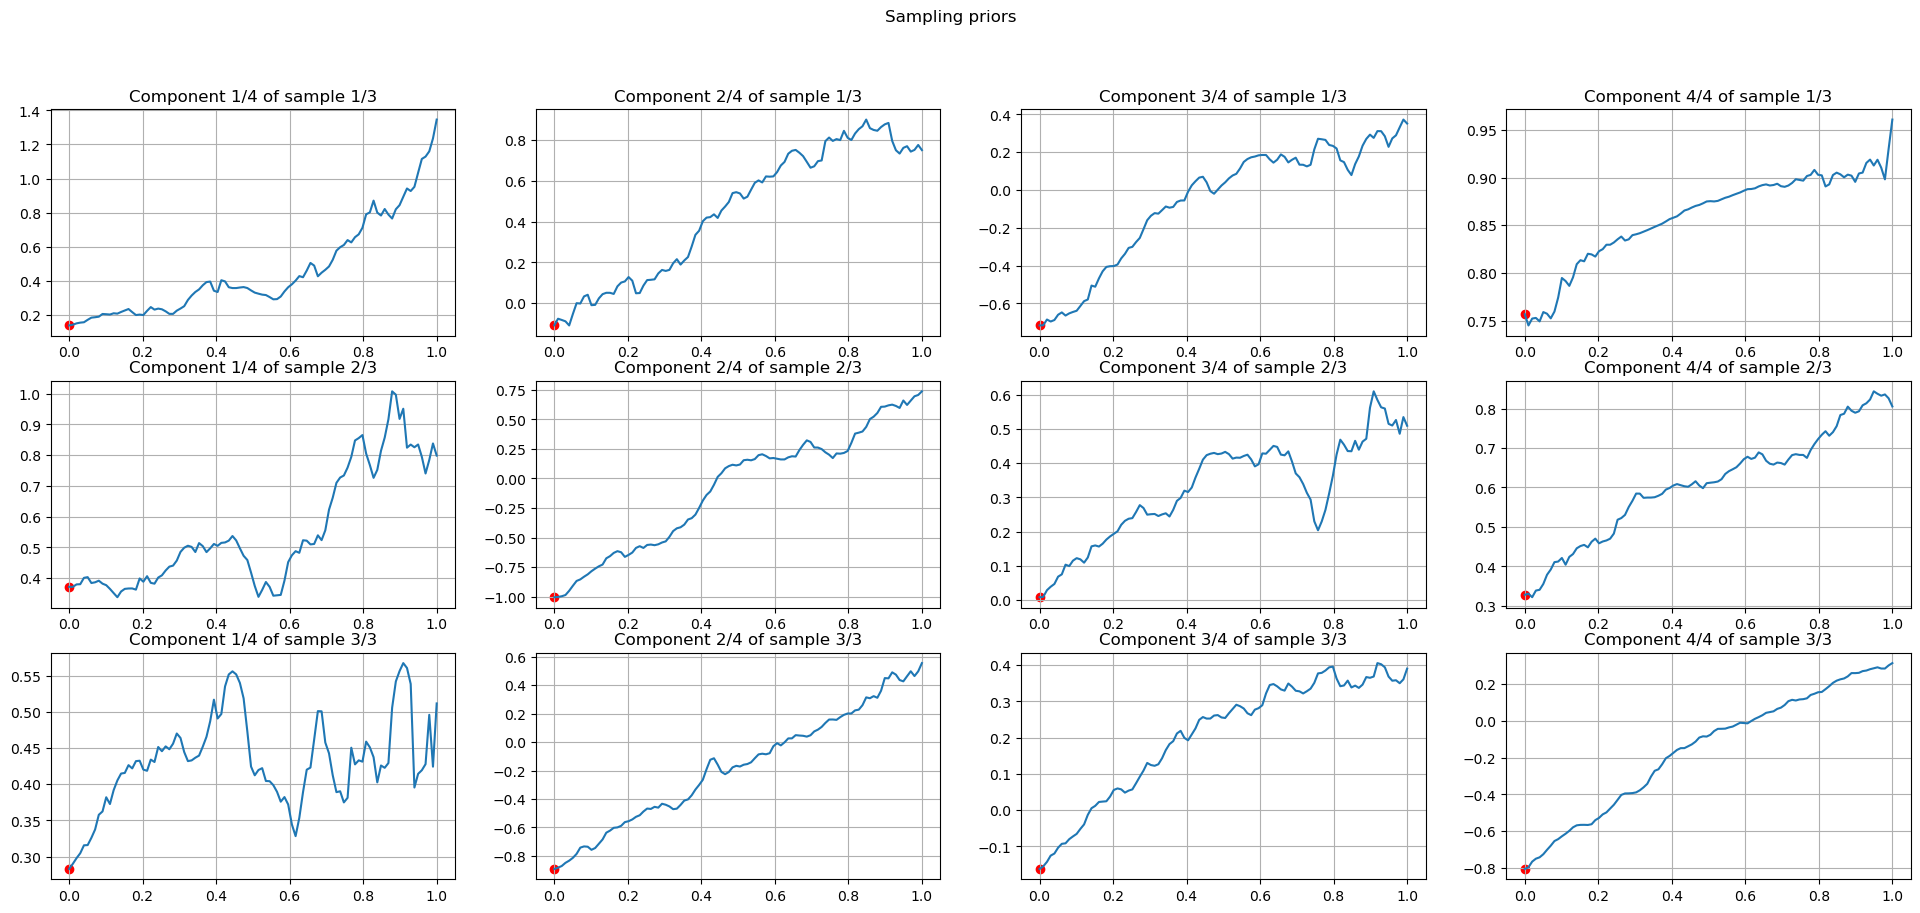

In [12]:
# SAMPLE PRIORS
# sample initial values z0s
prior_z0s = prior_z0.rsample((K,)).to(device) # (K,Dz)

# sample K Browian motions of dimension Dz
bm = torchsde.BrownianInterval(
    t_start, t_end, 
    size=(K, Dz), 
    device=device)

# sample full paths
with torch.no_grad():
    prior_samples = torchsde.sdeint(
        prior, prior_z0s, 
        times, 
        bm=bm, 
        method="euler", dt=1e-2) # (LENGTH,K,Dz)

# display
print(f"prior samples : {prior_samples.shape}")
fig, ax = plt.subplots(nrows=K, ncols=Dz, figsize=(8*K, 2.5*Dz))

for i in range(K):
    sample = prior_samples[:,i,:].squeeze(1) # (LENGTH,Dz)
    # print(f"sample : {sample.shape}")
    for j in range(Dz):
        s = sample[:,j] # (LENGTH,)
        ax[i,j].plot(times.detach().cpu(),s.detach().cpu())
        ax[i,j].set_title(f"Component {j+1}/{Dz} of sample {i+1}/{K}")
        ax[i,j].grid()
        ax[i,j].scatter(times[0].detach().cpu(), prior_z0s[i,j].detach().cpu(), marker='o', color='red')
        
fig.suptitle(f"Sampling priors")
plt.show()

Posterior

First, encode the data into a LSTM

In [13]:
class ContextLSTM(nn.Module):
    """LSTM model class to encode all observations,
    with their observation times, into a context
    vector that will be used in the posterior
    """
    def __init__(self, lstm_dim=Dl, n_layers=1, input_dim=Dx):
        # inputs:
        # lstm_dim : dimension of the LSTM
        # n_layers : number of LSTM layers
        # input_dim : input dimension, defaults to 1 (univariate time series)
        super().__init__()
        self.lstm_dim = lstm_dim
        self.n_layers = n_layers
        self.input_dim = input_dim
        self.lstm = nn.LSTM(
            input_size=self.input_dim + 1, # add 1 for time dimension
            hidden_size=self.lstm_dim,
            num_layers=self.n_layers,
            batch_first=True
        )
        
    def forward(self,t,x):
        """
        # inputs:
        # t : tensor (N,) of time stamps for a given single sample path
        # x : tensor (N,input_dim) of observations at times t for the single sample path
        # outputs:
        # h : tensor (lstm_dim) of hidden stats encoding (t,x)
        """
        if x.dim()==1:
            x = x.unsqueeze(-1)
        x_ext = torch.cat([t.unsqueeze(-1),x], dim=-1) # (N,input_dim+1)
        _,(hn,_) = self.lstm(x_ext) # hn (1,lstm_dim)
        
        return hn.squeeze() # (lstm_dim) even if the input is batched with B=1

    def __repr__(self):
        description = f"ContextLSTM with lstm_dim = {self.lstm_dim}, n_layers = {self.n_layers}, input_dim = {self.input_dim}"
        description += f"\nLSTM net : {self.lstm}"
        return description
    
context_lstm = ContextLSTM(input_dim=Dx).to(device)
print(context_lstm)

context = context_lstm(times, x)
print(f"Forming context with times {times.shape}, data {x.shape} : {context.shape}") # (Dl)

ContextLSTM with lstm_dim = 16, n_layers = 1, input_dim = 1
LSTM net : LSTM(2, 16, batch_first=True)
Forming context with times torch.Size([100]), data torch.Size([100]) : torch.Size([16])


Posterior for initial values

In [14]:
class EncoderStartingValue(nn.Module):
    """
    Encoder for the starting value of the latent variable.
    Uses the context vector from the LSTM to parameterize
    the mean and log-variance of a Gaussian distribution.
    NB : we assume a diagonal covariance matrix
    """
    def __init__(self, context_dim=Dl, latent_dim=Dz, n_layers=1, hidden_dim=32):
        # inputs:
        # context_dim : dimension of the context vector. This is the dimension of the LSTM (Dl)
        # latent_dim ; latent space dimension (Dz)
        # n_layers, hidden_dim : number and size of layers of the MLP
        super().__init__()
        self.context_dim = context_dim
        self.latent_dim = latent_dim
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        layers = []
        input_dim = self.context_dim
        for i in range(self.n_layers):
            layers.append(nn.Linear(input_dim, self.hidden_dim))
            layers.append(nn.Tanh())
            input_dim = self.hidden_dim
        self.mlp = nn.Sequential(*layers)
        self.mean = nn.Linear(self.hidden_dim, self.latent_dim)
        self.logvar = nn.Linear(self.hidden_dim, self.latent_dim)
        
    def forward(self, c):
        """
        # input:
        # c : context vector, tensor (K,context_dim)
        # output:
        # mean : tensor (K, latent_dim) : mean of the Gaussian
        # logvar : tensor (K, latent_dim) : log var of the Gaussian
        """
        x = self.mlp(c)
        mean = self.mean(x)
        logvar = self.logvar(x)
        
        return mean, logvar

    def __repr__(self):
        description = f"Encoder of Starting Value z0 given X\n"
        description += f"\tInput size (context vector) : {self.context_dim}\n"
        description += f"\tOutput dimension (latent vector dimension) : {self.latent_dim}\n"
        description += f"\tMLP : {self.mlp}\n"
        description += f"\tMean : {self.mean}\n"
        description += f"\tLog var : {self.logvar}"
        return description
    
q_phi_z0_model = EncoderStartingValue().to(device)
print(q_phi_z0_model)

Encoder of Starting Value z0 given X
	Input size (context vector) : 16
	Output dimension (latent vector dimension) : 4
	MLP : Sequential(
  (0): Linear(in_features=16, out_features=32, bias=True)
  (1): Tanh()
)
	Mean : Linear(in_features=32, out_features=4, bias=True)
	Log var : Linear(in_features=32, out_features=4, bias=True)


In [15]:
mean_z0_post, logvar_z0_post = q_phi_z0_model(context)
cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)

q_phi_z0 = torch.distributions.MultivariateNormal(
    loc=mean_z0_post,
    covariance_matrix=cov_z0_post
)

posterior_z0s = q_phi_z0.rsample((K,)).to(device)

print(f"Sampling Posterior initial values z0s for the SDEs")
print(f"\tDistribution mean : {mean_z0_post.shape}")
print(f"\tCovariance matrix : {cov_z0_post.shape}")
print(f"\tDistribution object : {q_phi_z0}")
print(f"Sampling {K} samples : {posterior_z0s.shape}")

Sampling Posterior initial values z0s for the SDEs
	Distribution mean : torch.Size([4])
	Covariance matrix : torch.Size([4, 4])
	Distribution object : MultivariateNormal(loc: torch.Size([4]), covariance_matrix: torch.Size([4, 4]))
Sampling 3 samples : torch.Size([3, 4])


Posterior SDE

In [16]:
class SDEPosterior(nn.Module):
    """
    Posterior SDE class
    """
    def __init__(self, input_dim=Dx, latent_dim=Dz, lstm_dim=Dl, shared_diffusion=shared_diffusion, hidden_dim=32):
        # we use a diagonal noise type
        # the SDE type is "Ito"
        super().__init__()
        self.noise_type = "diagonal"
        self.sde_type = "ito"
        self.Dx = input_dim
        self.Dz = latent_dim
        self.Dl = lstm_dim
        self.hidden_dim = hidden_dim

        # basic z|x encoder seen above
        self.encoder = ContextLSTM(lstm_dim=self.Dl, input_dim=self.Dx)
        self.context = None # context tensor
        
        # MLP for posterior drift
        self.posterior_drift = nn.Sequential(
            nn.Linear(self.Dz+self.Dl, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.hidden_dim),
            nn.Tanh(),
            nn.Linear(self.hidden_dim, self.Dz)
        )
        # MLP for shared diagonal diffusion
        self.shared_diffusion = shared_diffusion
        
    def encode(self,t,x):
        # separate method to encode the full data
        # inputs :
        # t : time steps, tensor (N,)
        # x : observations at times t, tensor (N,Dx) or (N,)
        self.context = self.encoder(t,x)

    def f(self,t,z):
        """Posterior drift"""
        # assume context has been computed in self.context
        # self.context is (Dl,)
        # z can be (K,Dz) or (N,K,Dz)
        K = z.size(-2)
        if z.dim()==2:
            ctx = self.context.unsqueeze(0).repeat(K,1) # (K,Dz)
        else:
            ctx = self.context.unsqueeze(0).unsqueeze(0) # (1,1,Dl)
            ctx = ctx.repeat(z.shape[0], z.shape[1], 1) # (N,K,Dl)
        # if self.context.size(0)==1 and z.size(0)>1:
        #     K = z.size(0)
        #     ctx = self.context.repeat(K,1) # ctx (K,Dl)
        #     print(f"ctx : {ctx.shape}")
        #     print(f"z : {z.shape}")
        # else:
        #     ctx = self.context
        #     print(f"ctx : {ctx.shape}")
        #     print(f"z : {z.shape}")
        z_ext = torch.cat([ctx, z], dim=-1) # form (K,Dl+Dz)
        posterior_drift = self.posterior_drift(z_ext) # (K,Dz)
        return posterior_drift

    def g(self,t,z):
        """Shared diffusion"""
        # assume self.context has been computed
        # inputs : t,z as above
        # outputs : g(t,z) : diagonal diffusion (S,Dz)
        # K = z.size(0)
        # ctx = self.context.unsqueeze(0).repeat(K,1)
        # if self.context.size(0)==1 and z.size(0)>1:
        #     K = z.size(0)
        #     ctx = self.context.repeat(K,1) # ctx (K,Dl)
        #     print(f"ctx : {ctx.shape}")
        #     print(f"z : {z.shape}")
        # else:
        #     ctx = self.context
        #     print(f"ctx : {ctx.shape}")
        #     print(f"z : {z.shape}")
        
        # print(f"diffusion method : ctx {ctx.shape}")
        # 
        # WE DO NOT USE CONTEXT IN THE DIFFUSION AS THE INPUT IS OF SHAPE Dz
        #
        # print(f"diffusion method : z {z.shape}")
        # z_ext = torch.cat([ctx, z], dim=-1) # form (K,Dl+Dz)
        diff = self.shared_diffusion(t, z) # (K,Dz)
        return diff
    
    def __repr__(self):
        d = f"Latent SDE Model - Dz = {self.Dz} - LSTM dim = {self.Dl}\n"
        d += f"\t=> LSTM Encoder : {self.encoder}\n"
        d += f"\t=> Posterior Drift : {self.posterior_drift}\n"
        d += f"\t=> Shared Diffusion : {self.shared_diffusion}"
        return d
    
posterior = SDEPosterior(shared_diffusion=shared_diffusion).to(device)
print(posterior)

Latent SDE Model - Dz = 4 - LSTM dim = 16
	=> LSTM Encoder : ContextLSTM with lstm_dim = 16, n_layers = 1, input_dim = 1
LSTM net : LSTM(2, 16, batch_first=True)
	=> Posterior Drift : Sequential(
  (0): Linear(in_features=20, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Tanh()
  (4): Linear(in_features=32, out_features=4, bias=True)
)
	=> Shared Diffusion : Shared Diffusion model
 MLP is Sequential(
  (0): Linear(in_features=5, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=4, bias=True)
)


context : torch.Size([16])
Posterior z0s : torch.Size([3, 4])
posterior samples : torch.Size([100, 3, 4])


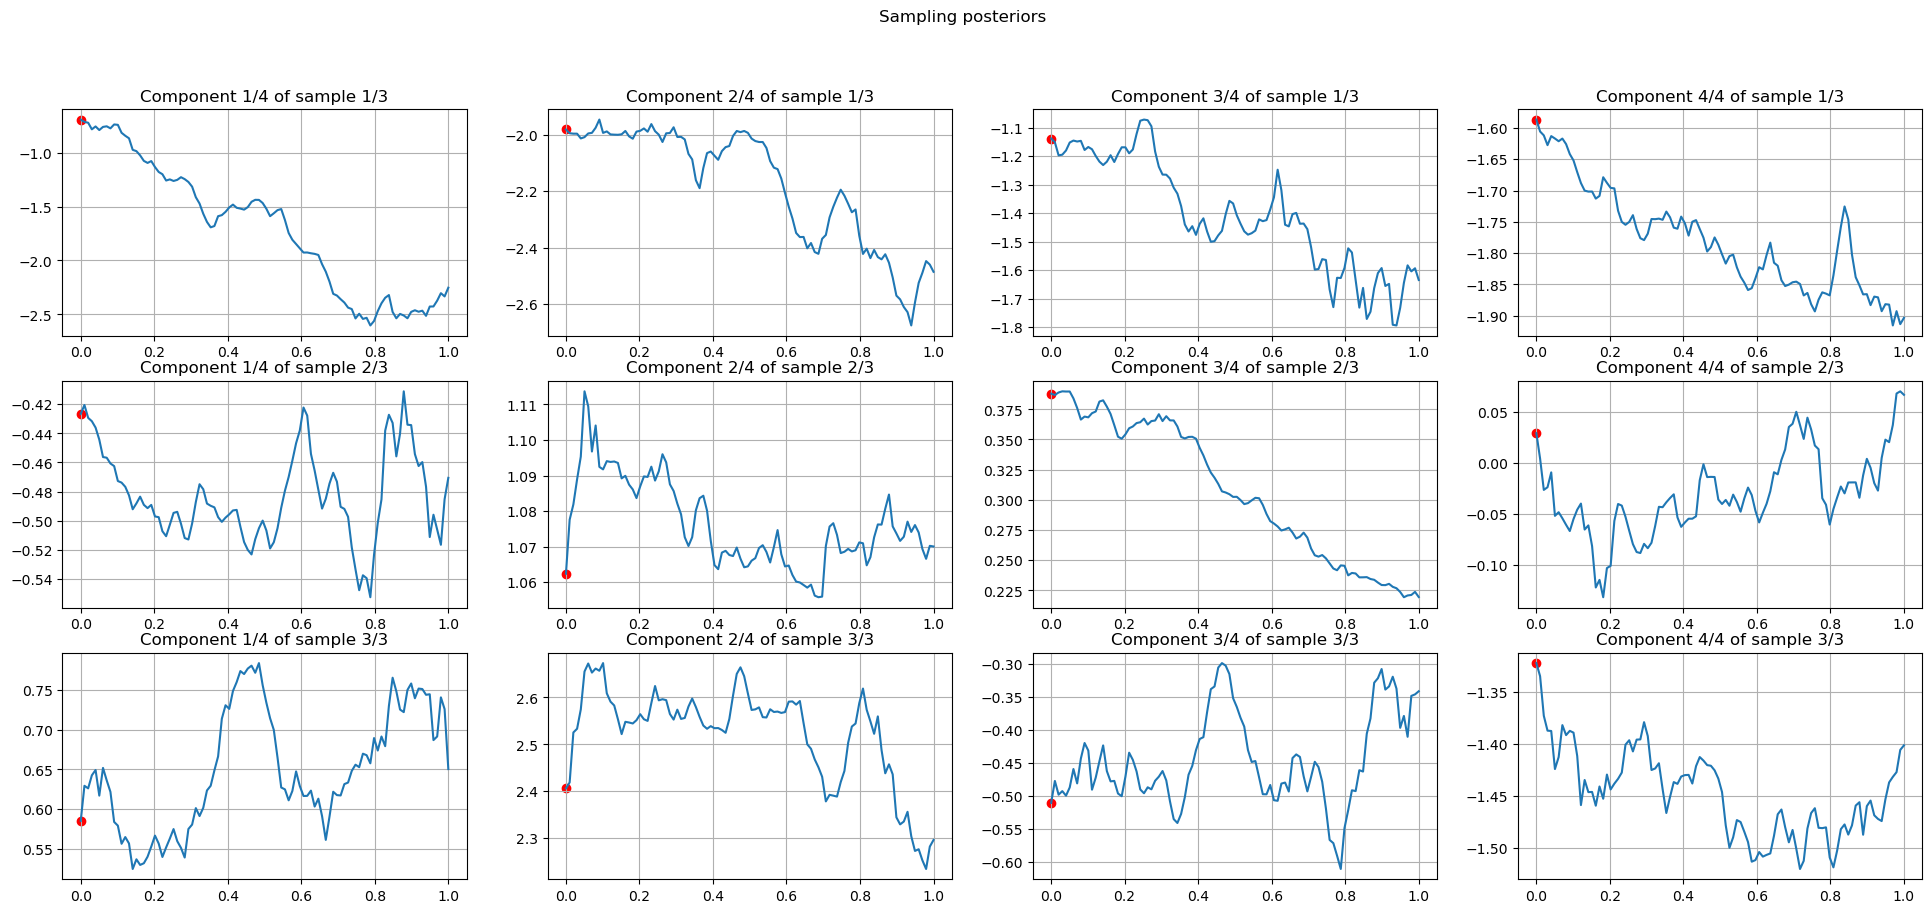

In [17]:
# SAMPLE POSTERIORS

# encode
posterior.encode(times, x.unsqueeze(-1))
print(f"context : {posterior.context.shape}")

# sample initial values
mean_z0_post, logvar_z0_post = q_phi_z0_model(posterior.context)
cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)
q_phi_z0 = torch.distributions.MultivariateNormal(
    loc=mean_z0_post,
    covariance_matrix=cov_z0_post
)
posterior_z0s = q_phi_z0.rsample((K,)).to(device)
print(f"Posterior z0s : {posterior_z0s.shape}")

# sample full path posteriors 
# instantiate K independent Brownian motions of dimension Dz
bm = torchsde.BrownianInterval(
    t_start, t_end, 
    size=(K, Dz), 
    device=device) 
# draw posterior samples
with torch.no_grad():
    posterior_samples = torchsde.sdeint(
        posterior, posterior_z0s, 
        times, 
        bm=bm, 
        method="euler", dt=1e-2) # (LENGTH,K,Dz)

# display
print(f"posterior samples : {posterior_samples.shape}")
fig, ax = plt.subplots(nrows=K, ncols=Dz, figsize=(8*K, 2.5*Dz))

for i in range(K):
    sample = posterior_samples[:,i,:].squeeze(1) # (LENGTH,Dz)
    # print(f"sample : {sample.shape}")
    for j in range(Dz):
        s = sample[:,j] # (LENGTH,)
        ax[i,j].plot(times.detach().cpu(),s.detach().cpu())
        ax[i,j].set_title(f"Component {j+1}/{Dz} of sample {i+1}/{K}")
        ax[i,j].grid()
        ax[i,j].scatter(times[0].detach().cpu(), posterior_z0s[i,j].detach().cpu(), marker='o', color='red')
        
fig.suptitle(f"Sampling posteriors")
plt.show()

Decoder  p_theta_x(x|z)

In [18]:
class GaussianDecoder(nn.Module):
    """
    Decoder from z (K,Dz) to x (K,Dx) or (N,K,Dz) to (N,K,Dx)
    We assume here a Gaussian distribution with diagonal covariance
    """
    def __init__(self, latent_dim=Dz, obs_dim=Dx, n_layers=1, hidden_dim=32):
        # inputs:
        # latent_dim ; latent space dimension (Dz)
        # obs_dim : observation space dimension (Dx)
        # n_layers, hidden_dim : number and size of layers of the MLP
        super().__init__()
        self.latent_dim = latent_dim
        self.obs_dim = obs_dim
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        layers = []
        input_dim = self.latent_dim
        for i in range(self.n_layers):
            layers.append(nn.Linear(input_dim, self.hidden_dim))
            layers.append(nn.Tanh())
            input_dim = self.hidden_dim
        self.mlp = nn.Sequential(*layers)
        self.mean = nn.Linear(self.hidden_dim, self.obs_dim)
        self.logvar = nn.Linear(self.hidden_dim, self.obs_dim)
        
    def forward(self, z):
        # input:
        # z : latent variable tensor (...,latent_dim)
        # output:
        # mean : tensor (..., obs_dim) : mean of the Gaussian
        # logvar : tensor (..., obs_dim) : log var of the Gaussian
        x = self.mlp(z)
        mean = self.mean(x)
        logvar = self.logvar(x)
        return mean, logvar

    def __repr__(self):
        description = f"Gaussian Decoder of x given z\n"
        description += f"\tInput size (latent variable dimension) : {self.latent_dim}\n"
        description += f"\tOutput dimension (observation vector dimension) : {self.obs_dim}\n"
        description += f"\tMLP : {self.mlp}\n"
        description += f"\tMean : {self.mean}\n"
        description += f"\tLog var : {self.logvar}"
        return description     
    
decoder = GaussianDecoder().to(device) 
print(decoder)

Gaussian Decoder of x given z
	Input size (latent variable dimension) : 4
	Output dimension (observation vector dimension) : 1
	MLP : Sequential(
  (0): Linear(in_features=4, out_features=32, bias=True)
  (1): Tanh()
)
	Mean : Linear(in_features=32, out_features=1, bias=True)
	Log var : Linear(in_features=32, out_features=1, bias=True)


In [19]:
mu_x, logvar_x = decoder(posterior_samples) # (L,K,Dz) => (L,K,Dx) x 2
print(f"inputs : {posterior_samples.shape}")
print(f"outputs : mu_x {mu_x.shape}, logvar_x {logvar_x.shape}")

# instantiate distribution
cov_x = torch.diag_embed(torch.exp(logvar_x)).to(device) # (B,N,K,Dx,Dx)
p_theta_x = torch.distributions.MultivariateNormal(loc=mu_x, covariance_matrix=cov_x)
print(f"\nDistribution p_theta_x : {p_theta_x}")
print(f"\tbatch shape : {p_theta_x.batch_shape}") # (B,N,K)
print(f"\tEvent shape : {p_theta_x.event_shape}") # (Dx)

inputs : torch.Size([100, 3, 4])
outputs : mu_x torch.Size([100, 3, 1]), logvar_x torch.Size([100, 3, 1])

Distribution p_theta_x : MultivariateNormal(loc: torch.Size([100, 3, 1]), covariance_matrix: torch.Size([100, 3, 1, 1]))
	batch shape : torch.Size([100, 3])
	Event shape : torch.Size([1])


Computing KL between prior and posterior SDEs

In [20]:
# Full pipeline
# min value for division by diffusion
epsilon = 1e-6

# draw initial values
prior_z0s = prior_z0.rsample((K,)).to(device) # (K,Dz)
posterior_z0s = q_phi_z0.rsample((K,)).to(device) # (K,Dz)

# KL for z0
kl_z0 = torch.distributions.kl_divergence(prior_z0, q_phi_z0).to(device)

# draw sample paths for prior and posterior
# z0s = torch.full((K,Dz), fill_value=0.0).to(device)
bm = torchsde.BrownianInterval(
    t_start, t_end, 
    size=(K, Dz), 
    device=device) # instantiate K brownian motions
prior_samples = torchsde.sdeint(
        prior, prior_z0s, 
        times, 
        bm=bm, 
        method="euler", dt=1e-2) # (LENGTH,K,Dz)
posterior.encode(times, x)
posterior_samples = torchsde.sdeint(
        posterior, posterior_z0s, 
        times, 
        bm=bm, 
        method="euler", dt=1e-2) # (LENGTH,K,Dz)
print(f"sampled prior paths : {prior_samples.shape}")
print(f"sampled posterior paths : {posterior_samples.shape}")

# compute KL path
prior_drift = prior.f(times, prior_samples)
posterior_drift = posterior.f(times, posterior_samples)
diff = posterior.g(times, posterior_samples)
diff2 = torch.where(diff.abs().detach() > epsilon, diff, torch.full_like(diff, fill_value=epsilon) * diff.sign())
deltas = torch.div(posterior_drift - prior_drift, diff2)**2
approx_int = torch.stack( [1/2 * (times[i+1]-times[i]) * (deltas[i,:,:] + deltas[i+1,:,:]) for i in range(times.shape[0]-1) ] )  # n_steps-1 x K x 1
kl_path = torch.sum(approx_int, dim=0).mean()

print(f"\tprior drift tensor : {prior_drift.shape}")
print(f"\tposterior drift tensor : {posterior_drift.shape}")
print(f"\tdiffusion : {diff2.shape}")

sampled prior paths : torch.Size([100, 3, 4])
sampled posterior paths : torch.Size([100, 3, 4])
	prior drift tensor : torch.Size([100, 3, 4])
	posterior drift tensor : torch.Size([100, 3, 4])
	diffusion : torch.Size([100, 3, 4])


In [21]:
print(f"KL path = {kl_path}")

KL path = 11.369402885437012


<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 38px; color: black; font-weight: bold;">
Model and Pipeline
</div>

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 20px; color: black; font-weight: bold;">
Computing losses and backpropagating
</div>

In [22]:
x.shape

torch.Size([100])

In [23]:
kl_z0 = torch.distributions.kl_divergence(q_phi_z0, prior_z0)  # (1)

print(f"KL between initial value distribution p_z0 and q_z0 : {kl_z0:.3e}")
print(f"KL path tensor : {kl_path.shape} => KL path : {kl_path:.3e}")

xs = x.unsqueeze(-1).repeat(1,K).unsqueeze(-1) # (N,K,1)
print(xs.shape)
rec_loss = p_theta_x.log_prob(xs)  # (N,K)
print(f"rec_loss tensor : {rec_loss.shape}")
rec_loss = rec_loss.mean(dim=-1).sum() # (N,K) => (1)
print(f"rec_loss : {rec_loss:.3e}")

loss = -rec_loss + kl_z0 + kl_path
print(f"loss totale : {loss:.3e}")

KL between initial value distribution p_z0 and q_z0 : 4.547e-02
KL path tensor : torch.Size([]) => KL path : 1.137e+01
torch.Size([100, 3, 1])
rec_loss tensor : torch.Size([100, 3])
rec_loss : -9.120e+01
loss totale : 1.026e+02


In [24]:
loss.backward()

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Training
</div>

In [40]:
# parameters
N_EPOCHS = 200
K = 30
xs = x.unsqueeze(-1).repeat(1,K).unsqueeze(-1) # (N,K,1)  # duplicate data

# models
prior_z0 = torch.distributions.MultivariateNormal(
    loc = torch.zeros((Dz,)).to(device),
    covariance_matrix=torch.eye(Dz).to(device)
)
q_phi_z0_model = EncoderStartingValue().to(device)
shared_diffusion = SharedDiffusion().to(device)
prior = SDEPrior(shared_diffusion=shared_diffusion).to(device)
posterior = SDEPosterior(shared_diffusion=shared_diffusion).to(device)
decoder = GaussianDecoder().to(device) 

# form parameters list and avoid duplicate for shared diffusion
param_dict = {}
models = {
    "shared_diffusion" : shared_diffusion,
    "prior" : prior,
    "posterior" : posterior,
    "decoder" : decoder,
    "q_phi_z0_model" : q_phi_z0_model
    }
for model_name, model in models.items():
    for param_name, param in model.named_parameters():
        full_name = f"{model_name}.{param_name}"
        param_dict[id(param)] = param  # the use of id avoids duplicating shared_diffusion parameters
parameters = list(param_dict.values())

# optimizer
learning_rate = 1e-5
optimizer = torch.optim.Adam(parameters, learning_rate)

# numerical tolerance for KL_path calculation
epsilon = 1e-6

In [41]:
list_epoch_loss = []
list_kl_z0s = []
list_kl_paths = []
list_rec_loss = []

# training mode

for epoch in range(N_EPOCHS):
    
    # perform one training step
    for model in models.values():
        model.train()
    
    # encode context
    posterior.encode(times, x)
    
    # draw prior z0 samples
    prior_z0s = prior_z0.rsample((K,)).to(device) # (K,Dz)
    
    # draw posterior z0 samples
    mean_z0_post, logvar_z0_post = q_phi_z0_model(posterior.context)
    cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)
    q_phi_z0 = torch.distributions.MultivariateNormal(
        loc=mean_z0_post,
        covariance_matrix=cov_z0_post
    )
    posterior_z0s = q_phi_z0.rsample((K,)).to(device)
    
    # sample BM for paths computations
    bm = torchsde.BrownianInterval(
        t_start, t_end, 
        size=(K, Dz), 
        device=device) 

    # sample prior paths
    prior_samples = torchsde.sdeint(
        prior, prior_z0s, 
        times, 
        bm=bm, 
        method="euler", dt=1e-2) # (LENGTH,K,Dz)
    
    # sample posterior paths
    posterior_samples = torchsde.sdeint(
        posterior, posterior_z0s, 
        times, 
        bm=bm, 
        method="euler", dt=1e-2)
    
    # decode
    mu_x, logvar_x = decoder(posterior_samples)
    cov_x = torch.diag_embed(torch.exp(logvar_x)).to(device) # (B,N,K,Dx,Dx)
    p_theta_x = torch.distributions.MultivariateNormal(loc=mu_x, covariance_matrix=cov_x)
    
    # compute losses
    kl_z0 = torch.distributions.kl_divergence(q_phi_z0, prior_z0)
    rec_loss = p_theta_x.log_prob(xs).mean(dim=-1).sum()
    # Kl_path
    prior_drift = prior.f(times, prior_samples)
    posterior_drift = posterior.f(times, posterior_samples)
    diff = posterior.g(times, posterior_samples)
    diff2 = torch.where(diff.abs().detach() > epsilon, diff, torch.full_like(diff, fill_value=epsilon) * diff.sign())
    deltas = torch.div(posterior_drift - prior_drift, diff2)**2
    approx_int = torch.stack( [1/2 * (times[i+1]-times[i]) * (deltas[i,:,:] + deltas[i+1,:,:]) for i in range(times.shape[0]-1) ] )  # n_steps-1 x K x 1
    kl_path = torch.sum(approx_int, dim=0).mean()
    
    # total loss
    loss = -rec_loss + kl_z0 + kl_path
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # report out
    print(f"Epoch {epoch+1:<3}/ {N_EPOCHS:<3} .. Total loss : {loss.item():.3e} .. kl_z0 : {kl_z0.item():.3e} .. kl_path : {kl_path.item():.3e} .. rec_loss : {-rec_loss.item():.3e}")
    
    # log
    list_epoch_loss.append(loss.item())
    list_kl_z0s.append(kl_z0.item())
    list_kl_paths.append(kl_path.item())
    list_rec_loss.append(-rec_loss.item())    

Epoch 1  / 200 .. Total loss : 2.888e+06 .. kl_z0 : 4.111e-02 .. kl_path : 2.888e+06 .. rec_loss : 1.029e+02
Epoch 2  / 200 .. Total loss : 5.685e+04 .. kl_z0 : 4.115e-02 .. kl_path : 5.675e+04 .. rec_loss : 1.046e+02
Epoch 3  / 200 .. Total loss : 3.704e+04 .. kl_z0 : 4.117e-02 .. kl_path : 3.694e+04 .. rec_loss : 1.020e+02
Epoch 4  / 200 .. Total loss : 4.747e+06 .. kl_z0 : 4.119e-02 .. kl_path : 4.747e+06 .. rec_loss : 1.066e+02
Epoch 5  / 200 .. Total loss : 7.520e+04 .. kl_z0 : 4.120e-02 .. kl_path : 7.509e+04 .. rec_loss : 1.028e+02
Epoch 6  / 200 .. Total loss : 7.268e+04 .. kl_z0 : 4.121e-02 .. kl_path : 7.258e+04 .. rec_loss : 1.021e+02
Epoch 7  / 200 .. Total loss : 2.703e+04 .. kl_z0 : 4.121e-02 .. kl_path : 2.693e+04 .. rec_loss : 1.053e+02
Epoch 8  / 200 .. Total loss : 1.659e+04 .. kl_z0 : 4.122e-02 .. kl_path : 1.649e+04 .. rec_loss : 1.032e+02
Epoch 9  / 200 .. Total loss : 8.871e+05 .. kl_z0 : 4.122e-02 .. kl_path : 8.870e+05 .. rec_loss : 1.014e+02
Epoch 10 / 200 .. T

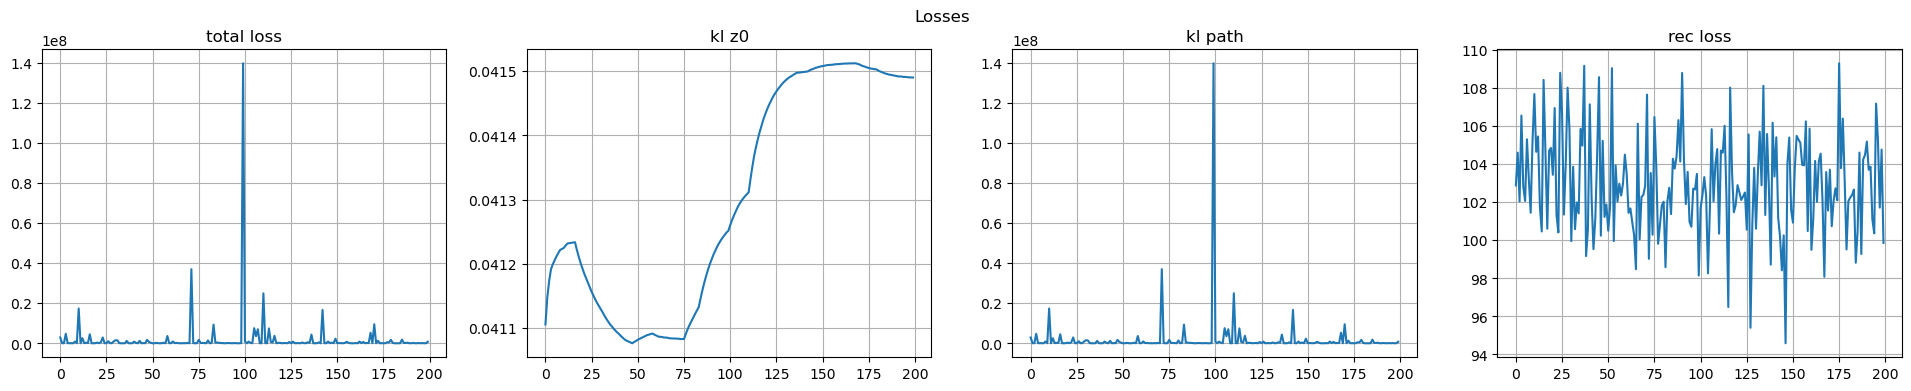

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(24,4))

results={
    "total loss" : list_epoch_loss,
    "kl z0" : list_kl_z0s,
    "kl path" : list_kl_paths,
    "rec loss" : list_rec_loss
}

for i,(k,v) in enumerate(results.items()):
    ax[i].plot(v)
    ax[i].set_title(k)
    ax[i].grid(True)
    
fig.suptitle("Losses")
plt.show()

<div style="background-color: #008B8B; padding: 15px; border-radius: 5px; font-size: 28px; color: black; font-weight: bold;">
Reconstruction
</div>

In [ ]:
N_DISPLAY = 1  # we will reconstruct one path
K = 5 # number of samples to draw

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# get data
all_ts = times
all_xs = all_data[0]
obs_ts = observation_times[0]
obs_xs = sampled_data[0]

# plot ground truth
ax.plot(all_ts.detach().cpu(), all_xs.detach().cpu(), label='ground truth', color='blue')
ax.scatter(obs_ts.detach().cpu(), obs_xs.detach().cpu(), label='observed data', marker='x', color='green')

# compute posterior and recontruction estimates with what the model has learnt
with torch.no_grad():
    # encode into context
    model_sde.encode(obs_ts.unsqueeze(0), obs_xs.unsqueeze(0))
    # compute posterior initial value
    mean_z0_post, logvar_z0_post = encoder_start(model_sde.context)
    cov_z0_post = torch.diag_embed(torch.exp(logvar_z0_post)).to(device)
    q_phi_z0 = torch.distributions.MultivariateNormal(
        loc=mean_z0_post,
        covariance_matrix=cov_z0_post
    )
    z0s_post = q_phi_z0.rsample((K,)).to(device)  # (K,Dl)
    # compute posterior paths
    current_zs = torchsde.sdeint(model_sde, z0s_post[0,:,:], all_ts, method='euler', dt=1e-3, logqp=False) # (N,K,Dz)
    zs_post = current_zs.unsqueeze(0).detach()
    # print(zs_post.shape)
    # compute mean and logvar, instantiate decoder distribution
    mu_x, logvar_x = decoder(zs_post) # (B,N,K,Dx) ; (B,N,K,Dx)
    cov_x = torch.diag_embed(torch.exp(logvar_x)).to(device) # (B,N,K,Dx,Dx)
    p_theta_x = torch.distributions.MultivariateNormal(loc=mu_x, covariance_matrix=cov_x)
    
# plot the sampled distributions
# sample from decoder distribution
# sampled_xs = p_theta_x.rsample((K,)) # (K,B,L,1,Dx=1)
# for k in range(K):
#     ax.plot(all_ts.detach().cpu(), sampled_xs[k,0,:,0,0].detach().cpu(), label=f'sample {k+1}')

# plot the computed distribution : mean and variance
# plot mean
ax.plot(all_ts.detach().cpu(), mu_x[0,:,0,0].detach().cpu(), label=f'mean p_theta_x')
# plot variance
variances = cov_x[0,:,0,0,0]
ax.fill_between(
    all_ts.detach().cpu(), 
    mu_x[0,:,0,0].detach().cpu() - 2*torch.sqrt(variances.detach().cpu()),
    mu_x[0,:,0,0].detach().cpu() + 2*torch.sqrt(variances.detach().cpu()),
    alpha = 0.5
)
    
fig.suptitle('learnt posterior')
plt.legend()
plt.show()